# Proyecto Fin de Máster - Máster en Big Data y Business Analytics V Edición
# Big Data International Campus - Universidad Europea Miguel de Cervantes

### *Eliasib Jesús García Martín*
---

# 1. Introducción

El propósito de este proyecto es el de crear un producto de datos que sigan las metodologías de análisis de datos que se han impartido a lo largo de este máster. 

Para ello, se ha propuesto como conjunto de datos (en adelante, dataset) sobre los que aplicar dicho análisis el conjunto sobre datos de uso de un sistema de alquiler de bicicletas en el área de la Bahía de San Francisco (SF Bay Area Bike Share - https://www.kaggle.com/benhamner/sf-bay-area-bike-share).

En cuanto al análisis a realizar, se centrará en desarrollar, utilizando las metodologías más adecuadas, los siguientes puntos clave:
* Investigar la influencia del tiempo atmosférico en los viajes en bicicletas registrados en el dataset.
* Reconocer gracias un modelo de clasificación patrones en las rutas que realizan los usuarios, en función de las estaciones de origen y de destino en viajes realizados en horarios similares.

# 2. Carga de los datos y análisis descriptivo

El dataset sobre el que se basa este proyecto está compuesto por cuatro registros de datos, en forma de ficheros CSV (Comma Separated Values). La información contenida en estos cuatro ficheros está interrelacionada, por lo que la unión de todos ellos conforma el conjunto completo de los datos.

Los ficheros de los que se compone el dataset son:
* **station.csv:** En este fichero se listan las estaciones donde los usuarios pueden alquilar y/o depositar las bicicletas. Las columas para cada registro son:
    * **id** - Identificador del registro
    * **name** -  Nombre de la estación
    * **lat** - Latitud de la ubicación de la estación
    * **lon** - Longitud de la ubicación de la estación
    * **dock_count** - Número de plazas de bicicletas que puede alojar la estación
    * **city** - Ciudad donde se encuentra la estación
    * **installation_date** - Fecha de instalación de la estación


* **weather.csv:** En este fichero se listan los datos del tiempo atmosférico registrados diariamente. Las columnas para cada registro son:
    * **date** - Fecha del registro
    * **max_temperature_f** - Temperatura máxima en grados Fahrenheit
    * **mean_temperature_f** - Temperatura media en grados Fahrenheit
    * **min_temperature_f** - Temperatura mínima en grados Fahrenheit
    * **max_dew_point_f** - Temperatura máxima de rocío en grados Fahrenheit
    * **mean_dew_point_f** - Temperatura media de rocío en grados Fahrenheit
    * **min_dew_point_f** - Temperatura mínima de rocío en grados Fahrenheit
    * **max_humidity** - Humedad máxima
    * **mean_humidity** - Humedad media
    * **min_humidity** - Humedad mínima
    * **max_sea_level_pressure_inches** - Presión atmosférica máxima a nivel del mar en pulgadas de mercurio
    * **mean_sea_level_pressure_inches** - Presión atmosférica media a nivel del mar en pulgadas de mercurio
    * **min_sea_level_pressure_inches** - Presión atmosférica mínima a nivel del mar en pulgadas de mercurio
    * **max_visibility_miles** - Visibilidad máxima en millas
    * **mean_visibility_miles** - Visibilidad media en millas
    * **min_visibility_miles** - Visibilidad mínima en millas
    * **max_wind_speed_mph** - Velocidad máxima del viento en millas por hora
    * **mean_wind_speed_mph** - Velocidad media del viento en millas por hora
    * **min_wind_speed_mph** - Velocidad mínima del viento en millas por hora
    * **precipitation_inches** - Precipitaciones en pulgadas
    * **cloud_cover** - Nubosidad en octas
    * **events** - Eventos atmosféricos (lluvia, niebla, tormenta...)
    * **wind_dir_degrees** - Dirección del viento en grados
    * **zip_code** - Código postal de la localización del registro


* **trip.csv:** En este fichero se listan los viajes en bicicleta registrados. Las columnas para cada registro son:
    * **id** - Identificador del registro
    * **duration** - Duración del viaje en segundos
    * **start_date** - Fecha y hora de inicio del viaje
    * **start_station_name** - Nombre de la estación donde se inició el viaje
    * **start_station_id** - Identificador de la estación donde se inició el viaje
    * **end_date** - Fecha y hora de finalización del viaje
    * **end_station_name** - Nombre de la estación donde se finalizó el viaje
    * **end_station_id** - Identificador de la estación donde se finalizó el viaje
    * **bike_id** - Identificador de la bicicleta utilizada para el viaje


* **status.csv:** En este fichero se listan registros por minuto del estado de las estaciones. Las columnas para cada registro son:
    * **station_id** - Identificador de la estación a la que se refiere el registro
    * **bikes_available** - Número de bicicletas disponibles
    * **docks_available** - Número de plazas de estacionamiento para bicicletas disponibles
    * **time** - Fecha y hora del registro
    


Puesto que el dataset se encuentra alojado en Kaggle, debemos descargar los ficheros CSV que lo componen, pero para ello se requiere la creación de una cuenta gratuita en Kaggle. Una vez se ha accedido a la plataforma, se puede descargar el dataset comprimido en formato zip a través de este enlace: https://www.kaggle.com/benhamner/sf-bay-area-bike-share/downloads/sf-bay-area-bike-share.zip

Una vez obtenido el fichero zip, para poder trabajar con los datos desde este notebook, se debe descomprimir los ficheros CSV bajo una carpeta `data/` relativa a la ruta donde se encuentre este notebook.

También debe tenerse en cuenta que para la carga de datos se utiliza el paquete PySpark, por lo que debe estar instalado para que el siguiente código se ejecute correctamente.

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

# Acessing to Spark and SQL contexts
sc = SparkContext.getOrCreate()
sqlContext = SQLContext.getOrCreate(sc)

# Loading dataframes.
# Options indicate that exist a header line and tries to infer the data type of each column
station_df = sqlContext.read.csv('data/station.csv', header=True, inferSchema=True)
weather_df = sqlContext.read.csv('data/weather.csv', header=True, inferSchema=True)
trip_df = sqlContext.read.csv('data/trip.csv', header=True, inferSchema=True)
status_df = sqlContext.read.csv('data/status.csv', header=True, inferSchema=True)

La librería PySpark, gracias a su dependencia de Pandas, también facilita bastante el análisis descriptivo de los datos, con funciones que calculan y muestran de manera ordenada valiosa información sobre los DataFrames. Un ejemplo es la función `.describe()`, gracias a la cual pueden verse tabulados valores como el máximo, el mínimo, la media o la desviación típica, entre otros, de las variables numéricas de los DataFrames.

In [2]:
# Creating Pandas dataframe from PySpark's
pd_station_df = station_df.toPandas()

In [3]:
# Describing station DataFrame
pd_station_df.describe()

,id,lat,long,dock_count
count,70.000000,70.000000,70.000000,70.000000
mean,43.000000,37.590243,-122.218416,17.657143
std,24.166092,0.203473,0.209446,4.010442
min,2.000000,37.329732,-122.418954,11.000000
25%,24.250000,37.389483,-122.400601,15.000000
50%,43.500000,37.631163,-122.312123,15.000000
75%,63.750000,37.788123,-122.078009,19.000000
max,84.000000,37.804770,-121.877349,27.000000


Como información relevante en el caso de las estaciones, se observa que con las latitudes y longitudes máximas y mínimas podríamos por ejemplo encuadrar en un mapa el área donde se situan la totalidad de las estaciones registradas. También puede ser útil conocer el número medio de plazas para bicicletas que hay en las estaciones, aunque habría que revisar si la desviación estándar es muy elevada, en cuyo caso la media no sería un valor muy significativo.

In [4]:
# Creating Pandas dataframe from PySpark's
pd_weather_df = weather_df.toPandas()

In [5]:
# Describing weather DataFrame
pd_weather_df.describe()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,zip_code
count,3661.000000,3661.000000,3661.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3664.000000,...,3664.000000,3652.000000,3652.000000,3652.000000,3664.000000,3664.000000,2766.000000,3664.000000,3664.000000,3665.000000
mean,70.580989,61.348812,51.947282,53.149820,48.794794,44.306840,85.446968,67.256993,46.458045,30.074997,...,29.965835,10.555312,9.822015,8.229737,16.398472,5.962063,22.299349,2.784389,266.605895,94325.000000
std,8.385572,7.234397,7.441444,6.885449,7.822281,9.355432,9.226972,10.945591,14.434784,0.134492,...,0.133476,2.193828,1.469894,2.862132,7.787588,3.340603,9.618813,2.276401,102.047645,404.615212
min,44.000000,38.000000,25.000000,20.000000,13.000000,2.000000,24.000000,24.000000,4.000000,29.500000,...,28.980000,5.000000,4.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,94041.000000
25%,64.000000,56.000000,47.000000,49.000000,44.000000,39.000000,82.000000,62.000000,37.000000,29.980000,...,29.880000,10.000000,10.000000,7.000000,13.000000,3.000000,17.000000,1.000000,254.000000,94063.000000
50%,70.000000,61.000000,53.000000,54.000000,49.000000,46.000000,86.000000,68.000000,48.000000,30.060000,...,29.950000,10.000000,10.000000,10.000000,16.000000,6.000000,22.000000,3.000000,297.000000,94107.000000
75%,77.000000,67.000000,58.000000,58.000000,55.000000,52.000000,93.000000,74.000000,56.000000,30.170000,...,30.050000,10.000000,10.000000,10.000000,20.000000,8.000000,25.000000,5.000000,330.000000,94301.000000
max,102.000000,84.000000,75.000000,68.000000,65.000000,63.000000,100.000000,96.000000,93.000000,30.650000,...,30.370000,20.000000,20.000000,20.000000,128.000000,23.000000,114.000000,8.000000,2772.000000,95113.000000


En el caso de las temperaturas registradas, la propia estructura de los datos ya separaba la mayoría de su información por valores máximos, medios y mínimos, pero la aplicación de la función `.describe()` sobre este DataFrame también arroja nuevo datos interesantes, cómo cuáles fueron los valores de temperatura, humedad, presión atmosférica, velocidad del viento etc. máximos y mínimos alcanzados durante el tiempo que se registraron datos. También podemos comprobar gracias al cálculo de la desviación estándar y a su pequeño valor que el componente con menor variación en los registros fue el de la presión atmosférica.

In [6]:
# Creating Pandas dataframe from PySpark's
pd_trip_df = trip_df.toPandas()

In [7]:
# Describing trip DataFrame
pd_trip_df.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


En el caso de los viajes registrados, la única variable no categórica, y por tanto de la que podemos extraer información con la función `.describe()`, es la duración de los viajes en segundos, y resulta algo incómodo ver valores con exponentes. Por ello, se puede aplicar una transformación sobre los datos para obtener estos valores de duración en minutos y facilitar la observación de los valores de esta variable.

In [8]:
# Adding a new column to trip Pandas DataFrame, calculating per each 'duration' value its equivalence in minutes.
pd_trip_df['duration_minutes'] = pd_trip_df['duration'] / 60.0

In [9]:
# Describing trip DataFrame
pd_trip_df.describe()

,id,duration,start_station_id,end_station_id,bike_id,duration_minutes
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620,18.465831
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988,370.923950
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000,1.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000,5.733333
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000,8.616667
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000,12.583333
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000,287840.000000


Tras añadir una nueva columna con la duración de los viajes expresados en minutos, se ha clarificado la información sobre la duración de los viajes registrados, aunque por ejemplo, el valor tan elevado de la desviación estándar indica que la media no es un buen valor sobre el que apoyarse. Otro dato llamativo es que el viaje de mayor duración se ha extendido por 287840 minutos, lo que a la conversión suponen más de seis meses y medio.

Dada la gran cantidad de datos existentes referidos al estado de las estaciones, se omitirá el paso de transformar el DataFrame de PySpark a un DataFrame de Pandas, por riesgo a producir un fallo por falta de memoria. En su lugar, se presentará el análisis descriptivo directamente a través del DataFrame de PySpark, que tiene un aspecto visual algo más tosco.

In [10]:
# Describing status DataFrame
status_df.describe().show()

+-------+------------------+------------------+-----------------+-------------------+
|summary|        station_id|   bikes_available|  docks_available|               time|
+-------+------------------+------------------+-----------------+-------------------+
|  count|          71984434|          71984434|         71984434|           71984434|
|   mean| 42.53148689062416| 8.394812467373155|9.284729459705135|               null|
| stddev|23.761171622501745|3.9935858965709334|4.175441561132945|               null|
|    min|                 2|                 0|                0|2013/08/29 12:06:01|
|    max|                84|                27|               27|2015-08-31 23:59:02|
+-------+------------------+------------------+-----------------+-------------------+



Por último, en cuanto al estado de las estaciones, a nivel descriptivo los datos recogidos no aportan mucha información relevante, pero ha de comprenderse que el valor de los datos recogidos en este DataFrame radica en su variación en el tiempo, y no en los valores de los datos por sí solos.

# 3. Análisis exploratorio apoyado en algún método no supervisado

En este apartado, el análisis exploratorio escogido analizará la influencia de las variables relacionadas con el tiempo meteorológico en el número de viajes que se realizan partiendo de una estación concreta.

Para ello, son necesarias algunas transformaciones sobre los datos, de forma que se selecciona la información necesaria para agrupar el conjunto de datos meteorológicos y su asociación con una estación, según la cantidad de viajes que se realizan en dichas condiciones.

Primeramente, es necesario conocer cuántos viajes se realizan diariamente partiendo de las diferentes estaciones.

In [11]:
import numpy as np
from pyspark.sql.functions import to_timestamp, col, udf, max, min
from pyspark.sql.types import StringType

# Get a copy of trip dataframe, with start and end datetimes parsed to just date
trip_df_parsed_dates = trip_df.withColumn('start_date', to_timestamp(trip_df.start_date, 'MM/dd/yyyy HH:mm').cast('date')) \
.withColumn('end_date', to_timestamp(trip_df.end_date, 'MM/dd/yyyy HH:mm').cast('date'))

# Get a dataframe with the number of trips registered per day per station
trips_perDay_perStation_df = trip_df_parsed_dates.groupBy(['start_date', 'start_station_name', 'start_station_id']).count() \
.select('start_date', 'start_station_id', 'start_station_name', col('count').alias('n_trips'))

A continuación, se seleccionan los valores relevantes relacionados con el tiempo atmosférico. Se tomarán las columnas con valores medios para simplificar el dataframe resultante. Además, se precisa de algunas transformaciones intermedias, puesto que en el dataframe sobre el tiempo atmosférico, aparecen datos respectivos a diversos códigos postales, por lo que debemos relacionar cada estación con su correspondiente código postal, a partir de la ciudad donde se encuentran.

Consultando el número de ciudades diferentes que aparecen en los datos sobre las estaciones, y los diferentes código postales que aparecen en los datos sobre meteorología, encontramos que existe el mismo número de ciudades que de códigos postales, por lo que realizando una búsqueda por internet se puede relacionar los códigos postales con las ciudades a las que representan.

In [12]:
# Show each zip code on the weather dataframe
weather_df.select('zip_code').distinct().show()

# Show each city on the station dataframe
station_df.select('city').distinct().show()

# After searching on the web, the following relation city-zip code is registered
city_zip_code = {
    'Palo Alto': '94301',
    'San Francisco': '94107',
    'San Jose': '95113',
    'Redwood City': '94063',
    'Mountain View': '94041'
}

+--------+
|zip_code|
+--------+
|   94041|
|   94107|
|   94063|
|   95113|
|   94301|
+--------+

+-------------+
|         city|
+-------------+
|    Palo Alto|
|San Francisco|
|     San Jose|
| Redwood City|
|Mountain View|
+-------------+



Luego, añadimos la información faltante sobre los códigos postales en los dataframes sobre las estaciones.

In [13]:
# Define function returning a zip code, given a city name
def getZipCode(city):
    return city_zip_code[city]

getZipCodeUdf = udf(getZipCode) # Spark UserDefinedFunction
# Add zip code column on station dataframe
station_zipcode_df = station_df.withColumn('zip_code', getZipCodeUdf(station_df.city))
station_zipcode_df.sample(0.9).show(5)

+---+--------------------+------------------+-------------------+----------+--------+-----------------+--------+
| id|                name|               lat|               long|dock_count|    city|installation_date|zip_code|
+---+--------------------+------------------+-------------------+----------+--------+-----------------+--------+
|  2|San Jose Diridon ...|         37.329732|-121.90178200000001|        27|San Jose|         8/6/2013|   95113|
|  3|San Jose Civic Ce...|         37.330698|        -121.888979|        15|San Jose|         8/5/2013|   95113|
|  4|Santa Clara at Al...|         37.333988|        -121.894902|        11|San Jose|         8/6/2013|   95113|
|  6|    San Pedro Square|37.336721000000004|        -121.894074|        15|San Jose|         8/7/2013|   95113|
|  8| San Salvador at 1st|         37.330165|-121.88583100000001|        15|San Jose|         8/5/2013|   95113|
+---+--------------------+------------------+-------------------+----------+--------+-----------

In [14]:
# Joining station and trips_perDay_perStation_classified_df to add zip code
trips_perDay_perStation_zipcode_df = \
trips_perDay_perStation_df.join(station_zipcode_df, \
                                           trips_perDay_perStation_df.start_station_id == station_zipcode_df.id) \
.select('start_date', 'start_station_id', 'start_station_name', 'zip_code', 'n_trips')
trips_perDay_perStation_zipcode_df.show(1)

+----------+----------------+------------------+--------+-------+
|start_date|start_station_id|start_station_name|zip_code|n_trips|
+----------+----------------+------------------+--------+-------+
|2013-08-29|              13|     St James Park|   95113|      4|
+----------+----------------+------------------+--------+-------+
only showing top 1 row



Con esta información sobre los códigos postales en el dataframe sobre las estaciones y las los viajes por estación por día se posibilita la mezcla entre éste últimos y los datos sobre el tiempo atmosférico.

Ahora, se creará un dataframe con sólo los datos meteorológicos relevantes, el cual mezclaremos con los datos de viajes por estación por día.

In [15]:
# Check different 'events' on weather dataframe
weather_df.select('events').distinct().show()

+-----------------+
|           events|
+-----------------+
|             null|
|              Fog|
|             rain|
|         Fog-Rain|
|             Rain|
|Rain-Thunderstorm|
+-----------------+



In [16]:
# Unify events and mark nulls as 'Normal'
def unifyEvents(event):
    if (event == None):
        return 'Normal'
    if (event == 'rain'):
        return 'Rain'
        
    return event

unifyEventsUdf = udf(unifyEvents) # Spark UserDefinedFunction
weather_events_df = weather_df.withColumn('events', unifyEventsUdf(weather_df.events))
weather_events_df.select('events').distinct().show()

+-----------------+
|           events|
+-----------------+
|              Fog|
|         Fog-Rain|
|             Rain|
|Rain-Thunderstorm|
|           Normal|
+-----------------+



In [17]:
# Create dataframe excluding not relevant columns on weather datafame
weather_simplified_df = weather_events_df.select('date', 'mean_temperature_f', 'mean_dew_point_f', 'mean_humidity', \
                                         'mean_sea_level_pressure_inches', 'mean_visibility_miles', \
                                         'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover', \
                                         'events', 'wind_dir_degrees', 'zip_code') \
.withColumn('date', to_timestamp(weather_events_df.date, 'MM/dd/yyyy').cast('date')) # Parsing date properly

# Uncommenting the following line reveals that precipitation_inches was parsed as string
#print weather_simplified_df.dtypes

# Casting precipitation_inches to double
weather_simplified_df = weather_simplified_df.withColumn('precipitation_inches', \
                                                         weather_simplified_df.precipitation_inches.cast('double'))

weather_simplified_df.show(3)

+----------+------------------+----------------+-------------+------------------------------+---------------------+-------------------+--------------------+-----------+------+----------------+--------+
|      date|mean_temperature_f|mean_dew_point_f|mean_humidity|mean_sea_level_pressure_inches|mean_visibility_miles|mean_wind_speed_mph|precipitation_inches|cloud_cover|events|wind_dir_degrees|zip_code|
+----------+------------------+----------------+-------------+------------------------------+---------------------+-------------------+--------------------+-----------+------+----------------+--------+
|2013-08-29|              68.0|            58.0|         75.0|                         30.02|                 10.0|               11.0|                 0.0|        4.0|Normal|           286.0|   94107|
|2013-08-30|              69.0|            58.0|         70.0|                          30.0|                 10.0|               13.0|                 0.0|        2.0|Normal|           291.0|

In [18]:
from pyspark.sql import Row

# Checking join is possible: only one weather entry per trip entry
sample_trip_row = trips_perDay_perStation_zipcode_df.sample(0.1).head(1)[0].asDict()

print weather_simplified_df.where(weather_simplified_df.date == sample_trip_row['start_date']) \
.where(weather_simplified_df.zip_code == sample_trip_row['zip_code']).count()

1


In [19]:
# Join weather and trips per station per day dataframes
trips_weather_df = trips_perDay_perStation_zipcode_df.join(weather_simplified_df, \
    (trips_perDay_perStation_zipcode_df.start_date == weather_simplified_df.date) & \
    (trips_perDay_perStation_zipcode_df.zip_code == weather_simplified_df.zip_code)) \
    .drop('start_date', 'weather_simplified_df.zip_code')
    
trips_weather_df.sample(0.01).show(1)

+----------------+------------------+--------+-------+----------+------------------+----------------+-------------+------------------------------+---------------------+-------------------+--------------------+-----------+------+----------------+--------+
|start_station_id|start_station_name|zip_code|n_trips|      date|mean_temperature_f|mean_dew_point_f|mean_humidity|mean_sea_level_pressure_inches|mean_visibility_miles|mean_wind_speed_mph|precipitation_inches|cloud_cover|events|wind_dir_degrees|zip_code|
+----------------+------------------+--------+-------+----------+------------------+----------------+-------------+------------------------------+---------------------+-------------------+--------------------+-----------+------+----------------+--------+
|              67|    Market at 10th|   94107|      8|2013-11-03|              55.0|            41.0|         56.0|                         29.99|                 10.0|                9.0|                 0.0|        4.0|Normal|       

Una vez se han preparado los datos necesarios en un dataframe, se puede comprobar de forma numérica la relación entre las variables (en concreto, la posible relación entre las variables sobre el tiempo meteorológico y el número de viajes realizados en un mismo día) generando una matriz de correlación. Si el valor de correlación entre dos variables son cercanos a 1 se puede decir que son variables correladas, y que por lo tanto, existe una relación entre ellas.

In [20]:
# Create a list of weather related numeric variables
weather_cols = [col[0] for col in weather_simplified_df.dtypes if not col[0] in ['date', 'events', 'zip_code']]

# Generate correlation matrixes
for col in weather_cols:
    print "Correlation between n_trips and " + col + ":"
    print trips_weather_df.corr('n_trips', col)

Correlation between n_trips and mean_temperature_f:
0.00524055072626
Correlation between n_trips and mean_dew_point_f:
0.0750951065088
Correlation between n_trips and mean_humidity:
0.081691221956
Correlation between n_trips and mean_sea_level_pressure_inches:
-0.00529267027554
Correlation between n_trips and mean_visibility_miles:
-0.0316495411525
Correlation between n_trips and mean_wind_speed_mph:
0.206710591428
Correlation between n_trips and precipitation_inches:
-0.0408350746621
Correlation between n_trips and cloud_cover:
0.129230939378
Correlation between n_trips and wind_dir_degrees:
-0.00391972115935


En líneas generales, se puede apreciar que ninguno de los coeficientes de correlación son cercanos a 1, lo cual indica que las variables no están correladas, y aparentemente no guardan relación.

Se puede intentar apoyar la afirmación mediante el algoritmo de K-Means. Este algoritmo intenta agrupar los datos de entrada en diversos clústers según su similitud. Normalmente, K-Means resulta más efectivo cuando los valores de `K` (número de clústers) ronda entre `K = 2` y `K = 3`. Si el valor óptimo de `K` (se hallará más adelante) clústers es muy elevado puede significar que la agrupación de los datos no es sencilla, puesto que las relaciones entre ellos no son muy marcadas.

Al utilizar este algoritmo, se debe evitar el uso de variables categóricas, puesto que funciona mejor si sólo procesa valores cuantitativos. Para ello, se crea una copia del dataframe recién obtenido incluyendo solamente las variables cuantitativas.

In [21]:
# Feature columns
feature_cols = ['mean_temperature_f', 'mean_dew_point_f', 'mean_humidity', \
                                                 'mean_sea_level_pressure_inches', 'mean_visibility_miles', \
                                                 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover', \
                                                 'wind_dir_degrees', 'n_trips']

# Create a dataframe only with numeric variables
trips_weather_numeric_df = trips_weather_df.select(feature_cols)
trips_weather_kmeans_df = trips_weather_numeric_df

# Convert all variables to float type
for col in trips_weather_numeric_df.columns:
    if col in feature_cols:
        trips_weather_kmeans_df = trips_weather_kmeans_df.withColumn(col, trips_weather_kmeans_df[col].cast('float'))

Luego, se obtiene el número óptimo de clusters `K` por el [método del "Elbow"](https://en.wikipedia.org/wiki/Elbow_method_%28clustering%29) y se genera una gráfica para facilitar la visualización del valor donde el porcentaje de la varianza explicada comienza a ser menos variable.

In [22]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

# Create a VectorAssembler with the feature columns and transform the dataframe
vecAssembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df_kmeans = vecAssembler.transform(trips_weather_kmeans_df.na.drop()).select('features')

# Get the best K value
cost = np.zeros(10)
for k in range(2,10):
    kmeans = KMeans().setK(k).setFeaturesCol('features')
    model = kmeans.fit(df_kmeans.sample(False, 0.1, seed=25))
    cost[k] = model.computeCost(df_kmeans)

Text(0,0.5,u'Cost')

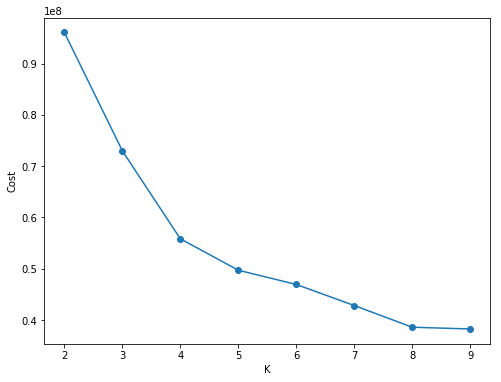

In [23]:
import matplotlib.pyplot as plt    

%matplotlib inline

# Show K values on a plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(range(2,10), cost[2:10], marker='o', linestyle='-')
ax.set_xlabel('K')
ax.set_ylabel('Cost')

Se observa que el valor óptimo es `K = 8`, lo cual hace complejo que el algoritmo K-Means agrupe eficientemente los datos introducidos, en función de las variables meteorológicas seleccionadas junto con el número de viajes.

Puede intentarse reducir el número óptimo de clústers (o expresado de otro modo, mejorar la eficiencia de la agrupación), pero esta vez sólo seleccionando de los datos la variable `n_trips` y la variable meteorológica que mejor coeficiente de correlación ofrecía (`mean_wind_speed_mph`).

In [24]:
reduced_features_cols = ['n_trips', 'mean_wind_speed_mph']

# Select only n_trips and mean_wind_speed_mph
reduced_kmeans_df = trips_weather_kmeans_df.select(reduced_features_cols)

# Create a VectorAssembler with the feature columns and transform the dataframe
vecAssembler2 = VectorAssembler(inputCols=reduced_features_cols, outputCol='features')
df_kmeans2 = vecAssembler2.transform(reduced_kmeans_df.na.drop()).select('features')

# Get the best K value
cost_2 = np.zeros(10)
for k in range(2,10):
    kmeans2 = KMeans().setK(k).setFeaturesCol('features')
    model2 = kmeans2.fit(df_kmeans2.sample(False, 0.1, seed=65))
    cost_2[k] = model2.computeCost(df_kmeans2)

Text(0,0.5,u'Cost')

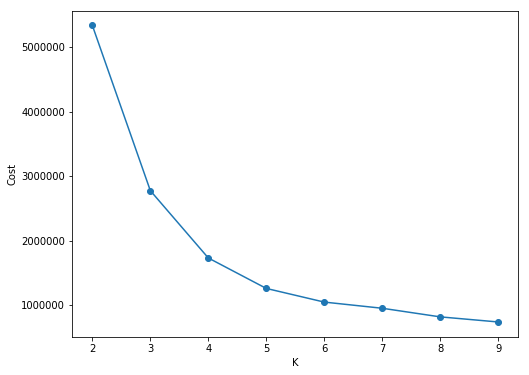

In [25]:
# Show K values on a plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(range(2,10), cost_2[2:10], marker='o', linestyle='-')
ax.set_xlabel('K')
ax.set_ylabel('Cost')

En este caso, el valor óptimo es `K = 5`, lo cual mejora la ejecución anterior, pero aún siendo el caso de las variables mejor correladas, no revela una relación clara entre dichas variables.

# 4. Selección de variables, elección, construcción y optimización de un modelo de Machine Learning supervisado

En este apartado, se creará un modelo de Machine Learning que detecte posibles patrones en los viajes realizados registrados en el dataset, de modo que se identifiquen los viajes que comienzan en una misma estación origen y terminan en una misma estación destino en horarios de salida y llegada similares.

Para ello, se utilizará la implementación del [algoritmo FP-Growth](https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Frequent_Pattern_Mining/The_FP-Growth_Algorithm) presente en la librería PySpark, que permite identificar patrones frecuentes dados en un conjunto de datos. Este algoritmo tiene algunas restricciones en cuanto a los datos de entrada:
- **Los datos de entrada deben representar transacciones.** En el caso de los viajes de nuestro dataset, el tránsito de una estación `A` a una estación `B` puede considerarse una transacción.
- **Las transacciones no pueden contener únicamente un estado repetidamente.** Esto implica que debe descartarse los viajes que comienzan y terminan en la misma estación, puesto que el algoritmo no puede procesarlos.
- **Los datos que representan los estados en las transacciones deben ser de tipo numérico.** Por lo tanto, se utilizará el ID de las estaciones para la creación del modelo.

Primeramente, se preparan los datos para poder usarlos como entrada para la creación del modelo. En un primer acercamiento, sólo se tendrá en cuenta las estaciones origen y destino, sin importar cuándo se realizaron los viajes (posteriormente se refinará el modelo para aplicar también esta componente).

In [26]:
# Check start and end station id columns are numeric
trip_station_ids_df = trip_df.select('start_station_id', 'end_station_id')
print trip_station_ids_df.dtypes
print "Total trips: " + str(trip_station_ids_df.count())

[('start_station_id', 'int'), ('end_station_id', 'int')]
Total trips: 669959


In [27]:
# Exclude trips starting and ending on the same station (not compaitble with FP-Growth)
trips_pfgrowth_df = trip_station_ids_df.where('start_station_id != end_station_id')
print "Trips to different station: " + str(trips_pfgrowth_df.count())

from pyspark.sql.types import ArrayType, IntegerType

# Input for FP-Growth must be an array column
twoColumnsToArrayUdf = udf(lambda c1,c2: (c1,c2),ArrayType(IntegerType()))
trips_pfgrowth_df = trips_pfgrowth_df.withColumn('features', twoColumnsToArrayUdf( \
                         trips_pfgrowth_df.start_station_id, trips_pfgrowth_df.end_station_id))

trips_pfgrowth_df.show(3)

Trips to different station: 645978
+----------------+--------------+--------+
|start_station_id|end_station_id|features|
+----------------+--------------+--------+
|              66|            67|[66, 67]|
|               4|             5|  [4, 5]|
|              10|            11|[10, 11]|
+----------------+--------------+--------+
only showing top 3 rows



In [28]:
from pyspark.ml.fpm import FPGrowth

minSupport = 0.001 # A station appears on 1 of each 1000 items
minConfidence = 0.5 # A transaction X => Y appears on 5 of each 10 items where X appears

# Create FP-Growth model
fpGrowth = FPGrowth(itemsCol='features', minSupport=minSupport, minConfidence=minConfidence)
fpGrowthModel = fpGrowth.fit(trips_pfgrowth_df)

Una vez generado el modelo y ajustado a los datos introducidos, se obtienen las reglas de asociación generadas, y su grado de confianza (valores entre 0 y 1):

In [29]:
# Show generated association rules
fpGrowthModel.associationRules.orderBy('confidence', ascending=False).show()

+----------+----------+------------------+
|antecedent|consequent|        confidence|
+----------+----------+------------------+
|      [30]|      [28]| 0.903623459096003|
|      [32]|      [28]|0.8976757369614512|
|      [27]|      [28]|0.8626149131767109|
|      [25]|      [22]|0.7786516853932585|
|      [31]|      [29]|0.7285714285714285|
|      [29]|      [31]|0.6714060031595577|
|      [37]|      [34]|0.6460373998219056|
|       [4]|       [2]|0.6252440725244073|
|       [5]|       [2]|0.5788546255506608|
|      [80]|      [84]|0.5201511335012594|
+----------+----------+------------------+



Como bien se menciona antes de la creación del modelo, las reglas de asociación recién obtenidas no tienen en cuenta las horas en las que se realizan los viajes, por lo que únicamente ofrecen información sobre las rutas más habituales, pero no reflejan un patrón de continuidad en el tiempo.

Con la creación de un segundo modelo, que trate de hallar ahora patrones temporales, combinado con las reglas de asociación obtenidas anteriormente se puede realizar un acercamiento más realista al propósito de hallar patrones en los viajes realizados. Para ello, se pueden crear datasets que filtren los viajes realizados entre las estaciones que aparecen en las reglas de asociación del primer modelo, y luego, sobre estos datos, repetir el proceso anterior, pero centrándose en la hora de inicio y finalización.

Hay que tener en cuenta que un viaje puede terminar en un día posterior al que se inició, por lo que el valor numérico para la hora en la que finaliza un viaje debe calcularse sumando a la hora de inicio el número de horas de duración que tuvo el viaje, y no la hora de finalización del mismo, que no reflejaría el cambio de día.

Para la creación de estos modelos, primero deben extraerse los datos relacionados con los pares de estaciones reflejados en  las reglas de asociación generadas por el anterior modelo. Luego, sobre los datos de cada par, se calculan los valores numéricos para las horas de inicio y finalización de cada viaje, y con ellos se repetirá el proceso de transformación a vectores, creación de los modelos FP-Growth y la generación de reglas de asociación.

In [43]:
# Getting station pairs as array from previous association rules
station_pairs = fpGrowthModel.associationRules.select('antecedent', 'consequent').collect()
station_pairs = [[row.antecedent[0], row.consequent[0]] for row in station_pairs]

print station_pairs

[[29, 31], [37, 34], [25, 22], [32, 28], [27, 28], [80, 84], [30, 28], [5, 2], [4, 2], [31, 29]]


In [85]:
# Get trips accomplishing the first association rule
first_pair = station_pairs[0]

trips_first_pair = trip_df.where( \
      'start_station_id == ' + str(first_pair[0]) + ' AND end_station_id == ' + str(first_pair[1]))

from pyspark.sql.functions import hour

# Parse dates and extract hour value
trips_first_pair = trips_first_pair.withColumn('start_date', \
        to_timestamp(trips_first_pair.start_date, 'MM/dd/yyyy HH:mm').cast('timestamp')) \
        .withColumn('end_date', to_timestamp(trips_first_pair.end_date, 'MM/dd/yyyy HH:mm') \
        .cast('timestamp'))

trips_first_pair = trips_first_pair.withColumn('start_hour', hour(trips_first_pair.start_date))

def getEndDateAddingDuration(start_hour, duration):
    return start_hour + int(duration/3600)

getEndDateAddingDurationUdf = udf(getEndDateAddingDuration)

trips_first_pair = trips_first_pair.withColumn( \
   'end_hour', getEndDateAddingDurationUdf(trips_first_pair.start_hour, \
                                           trips_first_pair.duration))
        
trips_first_pair.orderBy('duration', ascending=False).show(10)

+------+--------+-------------------+--------------------+----------------+-------------------+--------------------+--------------+-------+-----------------+--------+----------+--------+
|    id|duration|         start_date|  start_station_name|start_station_id|           end_date|    end_station_name|end_station_id|bike_id|subscription_type|zip_code|start_hour|end_hour|
+------+--------+-------------------+--------------------+----------------+-------------------+--------------------+--------------+-------+-----------------+--------+----------+--------+
|454392|   86381|2014-09-15 19:27:00|San Antonio Caltr...|              29|2014-09-16 19:27:00|San Antonio Shopp...|            31|    671|         Customer|   94040|        19|      42|
|690950|   19321|2015-03-20 11:59:00|San Antonio Caltr...|              29|2015-03-20 17:21:00|San Antonio Shopp...|            31|    680|         Customer|    2222|        11|      16|
|483065|    4814|2014-10-04 14:00:00|San Antonio Caltr...|       